In [1]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.activations import relu, softmax

In [2]:
(training_images, training_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

In [3]:
training_images = training_images / 255.0
test_images = test_images / 255.0

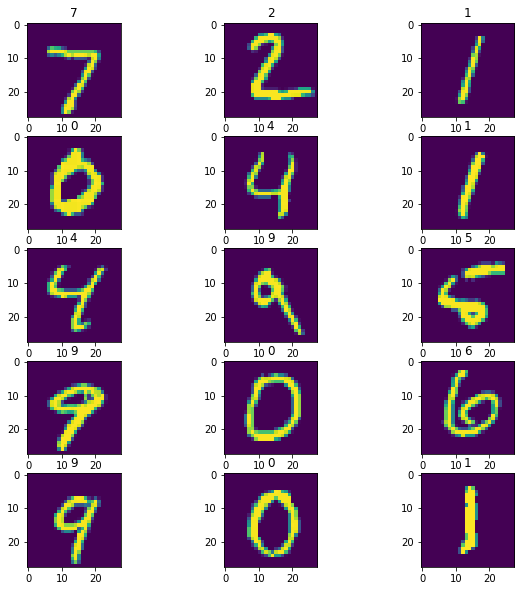

In [4]:
rows, cols = 5, 3
n = (rows * cols) - 1
fig, axs = plt.subplots(rows, cols, figsize=(10, 10))
axs = axs.ravel()
for i, (image, label) in enumerate(zip(test_images, test_labels)):
    axs[i].imshow(image)
    axs[i].set_title(label)
    if i == n:
        break

In [5]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [6]:
input_ = tf.keras.layers.Input(shape=(28,28,1), name="input")
x = layers.Conv2D(filters=32, kernel_size=5, activation=relu)(input_)
x = layers.MaxPooling2D(strides=2)(x)

x = layers.Conv2D(filters=64, kernel_size=5, activation=relu)(x)
x = layers.MaxPooling2D(strides=2)(x)
x = layers.Flatten()(x)
out = layers.Dense(10,
            activation=softmax,
            kernel_regularizer=tf.keras.regularizers.L2(0.01),
            name="output")(x)
model = keras.models.Model(inputs=[input_], outputs=[out])

In [7]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
output (Dense)               (None, 10)               

In [8]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=keras.metrics.SparseCategoricalAccuracy(),
              run_eagerly=False)

In [9]:
history = model.fit(x=training_images, 
                    y=training_labels, 
                    batch_size=64, 
                    epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
938/938 [==============================] - 3s 3ms/step - loss: 0.2277 - sparse_categorical_accuracy: 0.9575 - val_loss: 0.1361 - val_sparse_categorical_accuracy: 0.9801
Epoch 2/10
938/938 [==============================] - 3s 3ms/step - loss: 0.1597 - sparse_categorical_accuracy: 0.9751 - val_loss: 0.1284 - val_sparse_categorical_accuracy: 0.9811
Epoch 3/10
938/938 [==============================] - 3s 3ms/step - loss: 0.1458 - sparse_categorical_accuracy: 0.9776 - val_loss: 0.1420 - val_sparse_categorical_accuracy: 0.9762
Epoch 4/10
938/938 [==============================] - 3s 3ms/step - loss: 0.1447 - sparse_categorical_accuracy: 0.9793 - val_loss: 0.1297 - val_sparse_categorical_accuracy: 0.9817
Epoch 5/10
938/938 [==============================] - 3s 3ms/step - loss: 0.1374 - sparse_categorical_accuracy: 0.9807 - val_loss: 0.1715 - val_sparse_categorical_accuracy: 0.9741
Epoch 6/10
938/938 [==============================] - 3s 3ms/step - loss: 0.1354 - sparse_categorica

Text(0.5, 1.0, 'Accuracy')

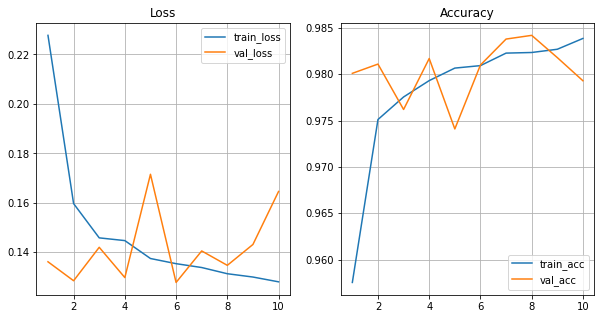

In [10]:
epoch = np.arange(1,11)

rows, cols = 1, 2
fig, axs = plt.subplots(rows, cols, figsize=(10,5))

train_loss = history.history['loss']
val_loss = history.history['val_loss']
axs[0].plot(epoch,train_loss)
axs[0].plot(epoch,val_loss)
axs[0].legend(['train_loss','val_loss'])
axs[0].grid(True)
axs[0].set_title("Loss")

train_acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
axs[1].plot(epoch,train_acc)
axs[1].plot(epoch,val_acc)
axs[1].legend(['train_acc','val_acc'])
axs[1].grid(True)
axs[1].set_title("Accuracy")

In [11]:
conv_outputs = [model.layers[1].output, model.layers[3].output]

In [12]:
fmaps = keras.models.Model(input_, outputs=conv_outputs)

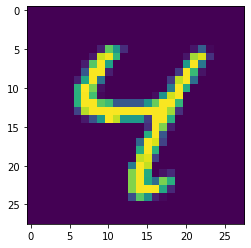

In [13]:
img = test_images[6]
plt.imshow(img)

In [14]:
out = fmaps(np.expand_dims(img,axis=0))

In [15]:
fmap1, fmap2 = out

In [16]:
fmap1 = fmap1.numpy()
fmap1 = np.squeeze(fmap1,axis=0)

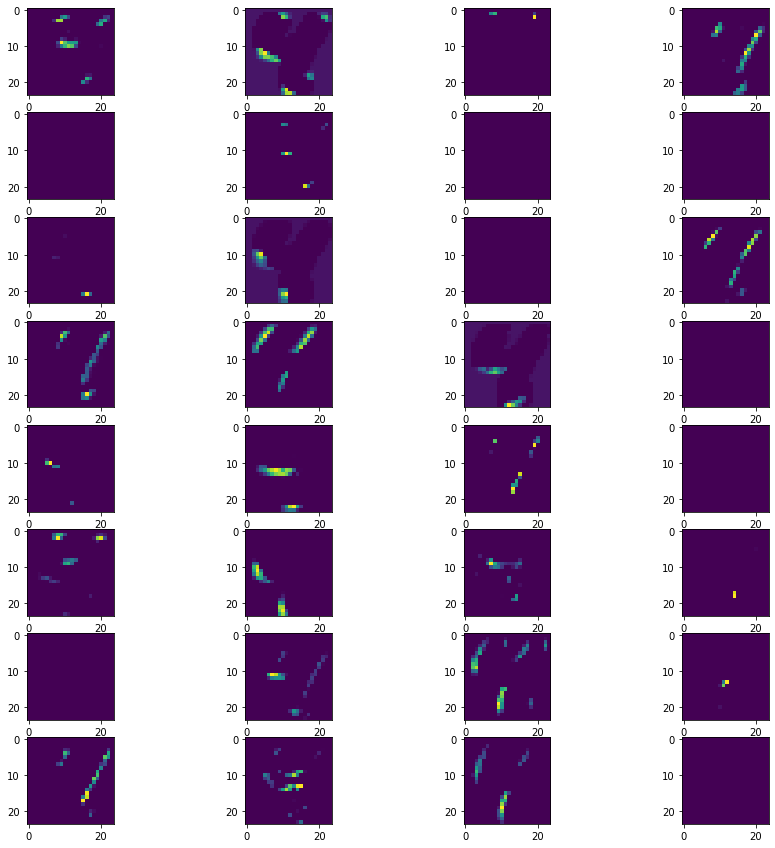

In [17]:
rows, cols = 8, 4
fig, axs = plt.subplots(rows, cols, figsize=(15,15))
axs = axs.ravel()
for i in range(rows*cols):
    f = fmap1[:,:,i]
    axs[i].imshow(f)

In [18]:
fmap2 = fmap2.numpy()
fmap2 = np.squeeze(fmap2,axis=0)

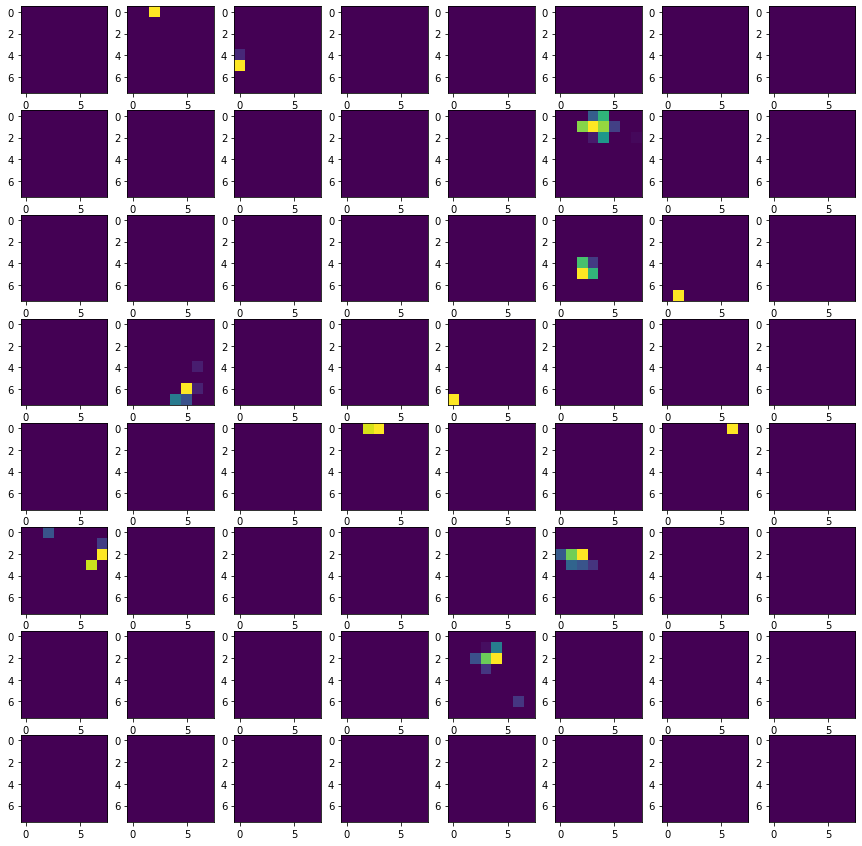

In [19]:
rows, cols = 8, 8
fig, axs = plt.subplots(rows, cols, figsize=(15,15))
axs = axs.ravel()
for i in range(rows*cols):
    f = fmap2[:,:,i]
    axs[i].imshow(f)